<a href="https://colab.research.google.com/github/gui98araujo/Amb_Git/blob/main/Regressao_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

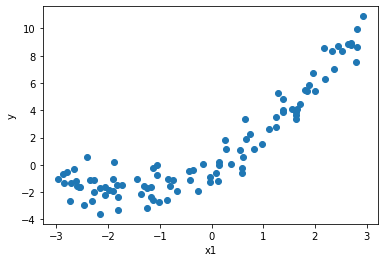

In [4]:
#Creating a database

import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 * X + np.random.randn(m , 1)

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y');

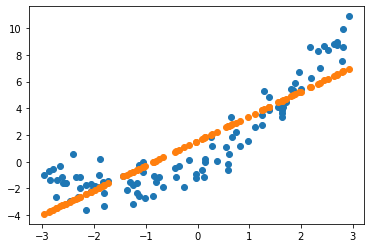

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X,y)

lr_pred = lr.predict(X)

plt.scatter(X,y)
plt.scatter(X, lr_pred)

In [6]:
# Using Polinomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_features =  PolynomialFeatures(degree=2, include_bias= False)

In [7]:
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [8]:
lr_poly =  LinearRegression()
lr_poly.fit(X_poly, y)

LinearRegression()

In [9]:
print(lr_poly.intercept_)
print(lr_poly.coef_)

[-0.21865419]
[[1.93366893 0.56456263]]


In [10]:
pred_poly = lr_poly.predict(X_poly)

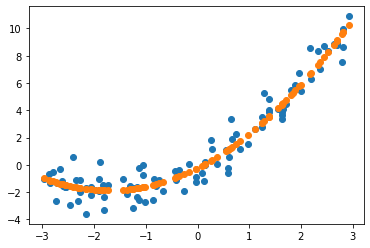

In [11]:
plt.scatter(X,y)
plt.scatter(X, pred_poly)

# Regressão Linear múltipla #

In [12]:
import numpy as np
import pandas as pd

np.random.seed(42)
m = 100
X1 = 6 * np.random.rand(m, 1) - 3
X2 = 3.2 * np.random.rand(m, 1) - 1

y = 1.3 * X1 ** 2 + 0.5 * X ** 2 + 2 * X1 * X2 + np.random.randn(m , 1)

df = pd.DataFrame({
    'x1': X1.ravel(),
    'x2': X2.ravel(),
    'y': y.ravel()
})
df.head()

,x1,x2,y
0,-0.752759,-0.899427,1.694043
1,2.704286,1.036513,19.002002
2,1.391964,0.005939,3.797220
3,0.591951,0.627426,0.659190
4,-2.063888,1.904213,1.672952


In [13]:
from sklearn.metrics import r2_score

x = df.drop("y",axis=1).copy()
y=df['y'].copy()
linear_reg = LinearRegression()
linear_reg.fit(x,y)
y_pred =  linear_reg.predict(x)

r2_score(y,y_pred)

0.06014739226422172

In [14]:
poly_feature = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = pd.DataFrame(poly_feature.fit_transform(x), columns = ["x1", "x2", "x1quadrado", "x1x2", "x2quadrado"])
x_poly.head()

,x1,x2,x1quadrado,x1x2,x2quadrado
0,-0.752759,-0.899427,0.566647,0.677052,0.808968
1,2.704286,1.036513,7.313162,2.803028,1.074360
2,1.391964,0.005939,1.937563,0.008267,0.000035
3,0.591951,0.627426,0.350406,0.371406,0.393664
4,-2.063888,1.904213,4.259634,-3.930082,3.626026


In [15]:
linear_reg = LinearRegression()
linear_reg.fit(x_poly, y)
r2_score(y, linear_reg.predict(x_poly))

0.9756123530206587